## EDA And Feature Engineering Of Google Play Store Dataset
1. Problem statement. Today, 1.85 million different apps are available for users to download.      Android users have even more from which to choose, with 2.56 million available through the        Google  Play Store. These apps have come to play a huge role in the way we live our lives today.  Our Objective is to find the Most Popular Category, find the App with largest number of installs  , the App with largest size etc.
2. Data Collection.
The data consists of 20 column and 10841 rows.

## Steps We are Going to Follow
1. Data Cleaning
2. Exploratory Data Analysis(EDA)
3. Featur Engineering(FE)

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
df = pd.read_csv('GooglePlaystore_Dataset.csv')

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.shape

(10841, 13)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insight From Dataset
The dataset has missing values

## Data Cleaning

In [50]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [51]:
dfCopy = df.copy()

In [52]:
dfCopy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [53]:
dfCopy['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [54]:
dfCopy['Reviews'].dtype

dtype('O')

In [55]:
dfCopy['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [ ]:
dfCopy['Reviews'].str.isnumeric().sum()

In [56]:
dfCopy[~dfCopy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [57]:
dfCopy.drop(dfCopy.index[10472], inplace = True)

In [58]:
dfCopy.shape

(10840, 13)

In [59]:
dfCopy[~dfCopy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [60]:
dfCopy['Reviews'] = dfCopy['Reviews'].astype(int)

In [61]:
dfCopy['Reviews'].dtype

dtype('int64')

In [62]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [63]:
## Handling Size Columns
dfCopy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [64]:
## Converting the whole M-byte column into K-byte
## By defining a function

def Convert_size (Size):
    if isinstance(Size, str):
        if 'k' in Size:
            return float(Size.replace('k','')) / 1024
        elif 'M' in Size:
            return float(Size.replace('M',''))
        elif 'Varies with device' in Size:
            return np.nan
        else:
            return np.nan
    return Size

In [65]:
dfCopy['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [66]:
## let's use this function
dfCopy['Size'] = dfCopy['Size'].apply(Convert_size)

In [67]:
dfCopy['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [68]:
## pd.set_option('display.float_format', '{:.2f}'.format)
## setting pandas display formate

In [69]:
##np.set_printoptions(suppress=True) ## surpress scientific notation 
np.set_printoptions(precision=2) ## show 2 decimal places

In [70]:
dfCopy['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 1.96e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [71]:
dfCopy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [72]:
dfCopy['Size'].dtype

dtype('float64')

In [73]:
dfCopy = dfCopy.rename(columns = {'Size' : 'Size_in_mb'})

In [74]:
dfCopy.head(2)

,App,Category,Rating,Reviews,Size_in_mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [88]:
#np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [89]:
dfCopy['Size_in_mb'].unique()

array([ 19.  ,  14.  ,   8.7 ,  25.  ,   2.8 ,   5.6 ,  29.  ,  33.  ,
         3.1 ,  28.  ,  12.  ,  20.  ,  21.  ,  37.  ,   2.7 ,   5.5 ,
        17.  ,  39.  ,  31.  ,   4.2 ,   7.  ,  23.  ,   6.  ,   6.1 ,
         4.6 ,   9.2 ,   5.2 ,  11.  ,  24.  ,    nan,   9.4 ,  15.  ,
        10.  ,   1.2 ,  26.  ,   8.  ,   7.9 ,  56.  ,  57.  ,  35.  ,
        54.  ,   0.2 ,   3.6 ,   5.7 ,   8.6 ,   2.4 ,  27.  ,   2.5 ,
        16.  ,   3.4 ,   8.9 ,   3.9 ,   2.9 ,  38.  ,  32.  ,   5.4 ,
        18.  ,   1.1 ,   2.2 ,   4.5 ,   9.8 ,  52.  ,   9.  ,   6.7 ,
        30.  ,   2.6 ,   7.1 ,   3.7 ,  22.  ,   7.4 ,   6.4 ,   3.2 ,
         8.2 ,   9.9 ,   4.9 ,   9.5 ,   5.  ,   5.9 ,  13.  ,  73.  ,
         6.8 ,   3.5 ,   4.  ,   2.3 ,   7.2 ,   2.1 ,  42.  ,   7.3 ,
         9.1 ,  55.  ,   0.02,   6.5 ,   1.5 ,   7.5 ,  51.  ,  41.  ,
        48.  ,   8.5 ,  46.  ,   8.3 ,   4.3 ,   4.7 ,   3.3 ,  40.  ,
         7.8 ,   8.8 ,   6.6 ,   5.1 ,  61.  ,  66.  ,   0.08,   8.4 ,
      

In [90]:
dfCopy['Size_in_mb'].value_counts()

Size_in_mb
11.000000    198
12.000000    196
14.000000    194
13.000000    191
15.000000    184
            ... 
0.539062       1
0.864258       1
0.996094       1
0.568359       1
0.604492       1
Name: count, Length: 459, dtype: int64

In [92]:
dfCopy['Size_in_mb'].dtype

dtype('float64')

In [75]:
dfCopy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [76]:
dfCopy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [77]:
dfCopy.head(2)

,App,Category,Rating,Reviews,Size_in_mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [93]:
Char_to_remove = [',','+','$']
col_to_clean = ['Installs','Price']
for i in Char_to_remove:
    for j in col_to_clean:
        dfCopy[j] = dfCopy[j].str.replace(i,'')

In [94]:
dfCopy['Price'] = dfCopy['Price'].astype(float)
dfCopy['Installs'] = dfCopy['Installs'].astype(int)

In [95]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size_in_mb      9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [96]:
dfCopy['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [97]:
dfCopy['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [98]:
dfCopy.head(2)

,App,Category,Rating,Reviews,Size_in_mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [99]:
dfCopy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [100]:
##handling Lastupdate features
dfCopy['Last Updated'] = pd.to_datetime(dfCopy['Last Updated'])

In [101]:
dfCopy.head(2)

,App,Category,Rating,Reviews,Size_in_mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [102]:
dfCopy['Day'] = dfCopy['Last Updated'].dt.day
dfCopy['Month'] = dfCopy['Last Updated'].dt.month
dfCopy['Year'] = dfCopy['Last Updated'].dt.year

In [103]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size_in_mb      9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [104]:
dfCopy.head(2)

,App,Category,Rating,Reviews,Size_in_mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [115]:
dfCopy.shape

(10840, 16)

## EDA

In [130]:
dfCopy[dfCopy.duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,17,2,2017
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,17,2,2017
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up,27,7,2018
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up,27,7,2018
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up,27,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34.0,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up,25,7,2018
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34.0,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up,25,7,2018
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device,2,8,2018
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device,2,8,2018


In [135]:
dfCopy = dfCopy.drop_duplicates()

In [142]:
dfCopy[dfCopy.duplicated('App')].shape

(698, 16)

In [144]:
dfCopy = dfCopy.drop_duplicates(subset = ['App'], keep = 'first')

In [145]:
dfCopy.shape

(9659, 16)

In [146]:
dfCopy['Type'].isnull().sum()

np.int64(1)

In [147]:
dfCopy.dropna(subset = ['Type'], inplace = True)

In [148]:
dfCopy.shape

(9658, 16)

## Explore Data

In [154]:
numeric_features = [feature for feature in dfCopy.columns if dfCopy[feature].dtype != 'O']
categorical_features = [ feature for feature in dfCopy.columns if dfCopy[feature].dtype == 'O']

print('We have {} numerical features : {}' .format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}' .format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size_in_mb', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.  
3. Rating :- Application's rating on playstore  
4. Reviews :- Number of reviews of the App.  
5. Size :- Size of the App.  
6. Install :- Number of Installs of the App   
7. Type :- If the App is free/paid  
8. Price :- Price of the app (0 if it is Free)  
9. Content Rating :- Appropiate Target Audience of the App.  
10. Genres:- Genre under which the App falls.  
11. Last Updated :- Date when the App was last updated  
12. Current Ver :- Current Version of the Application  
13. Android Ver :- Minimum Android Version required to run the App   

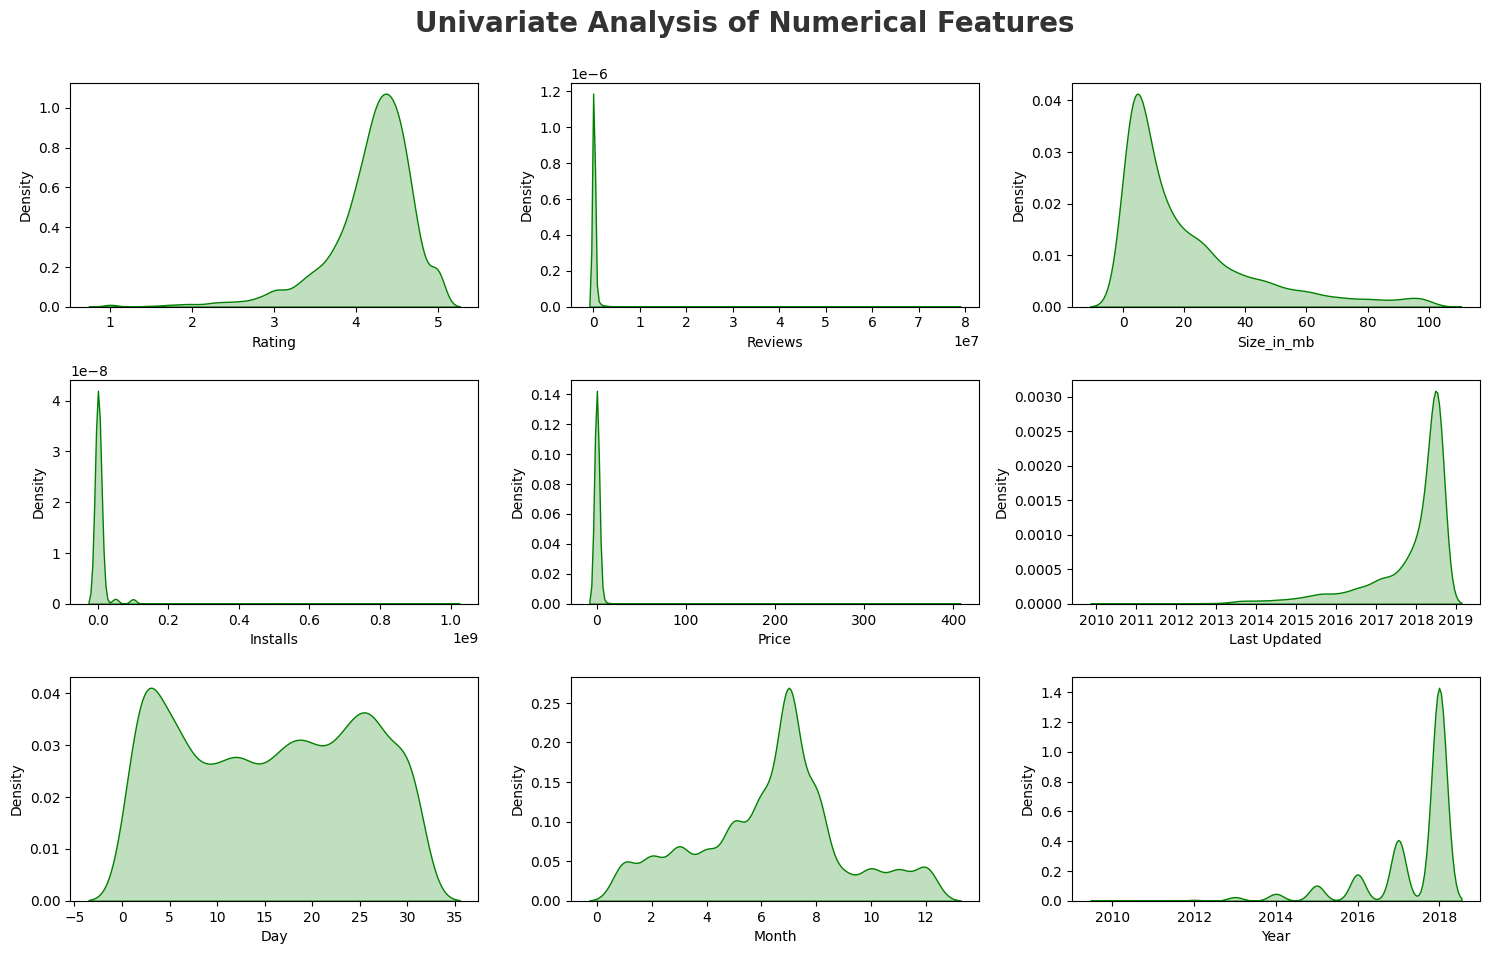

In [164]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight= 'bold', alpha = 0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x= dfCopy[numeric_features[i]], shade = True , color = 'g')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observations
.Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

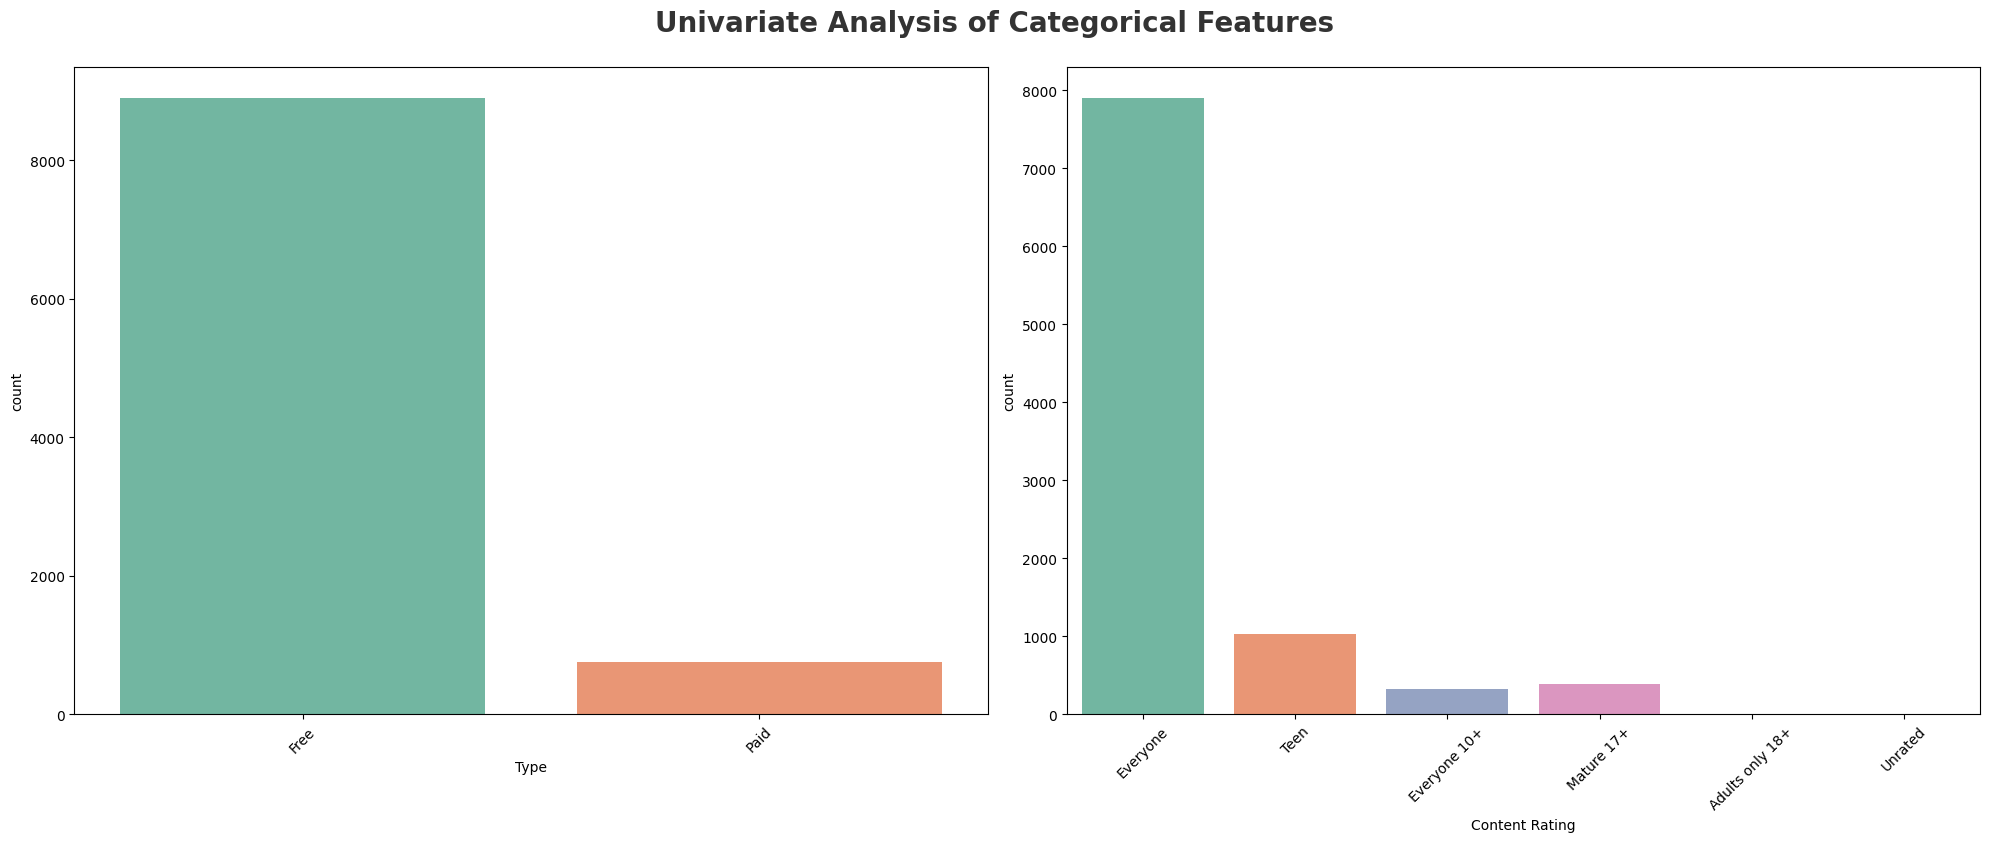

In [185]:
## Categorial Column
plt.figure(figsize = (20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize = 20 , fontweight = 'bold', alpha = 0.8, y=1.)
category = ['Type','Content Rating']
for j in range (0,len(category)):
    plt.subplot(2,2,1+j)
    sns.countplot(x = dfCopy[category[j]],palette="Set2")
    plt.xlabel(category[j])
    plt.xticks(rotation = 45)
    plt.tight_layout()

## Which is the most popular app category?

<Axes: ylabel='count'>

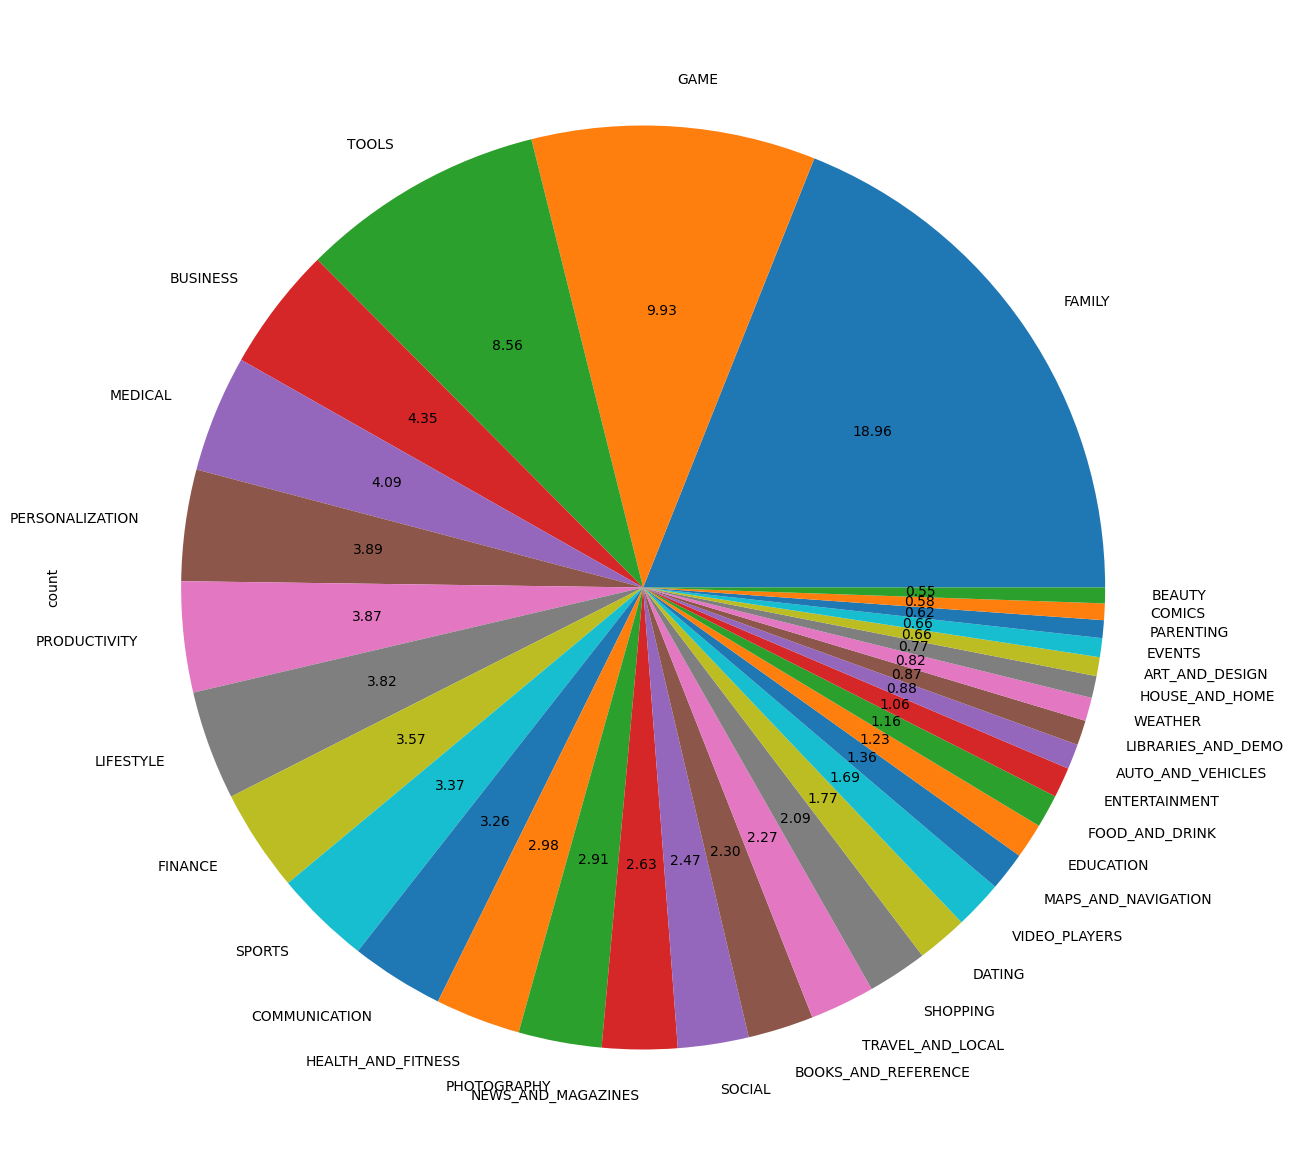

In [190]:
dfCopy['Category'].value_counts().plot.pie(x = dfCopy['Category'] , figsize=(15,15),autopct='%1.2f')

## Observation
1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

## Top 10 app category?

In [201]:
## dfCopy['Category'].value_counts().head(10)
## for bottom dfCopy['Category'].value_counts().tail(10)

Category
FAMILY             1831
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64

In [234]:
## top 10 app category by creating dataframe 
dfCategory = pd.DataFrame(dfCopy['Category'].value_counts())

In [235]:
dfCategory

,count
Category,
FAMILY,1831
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


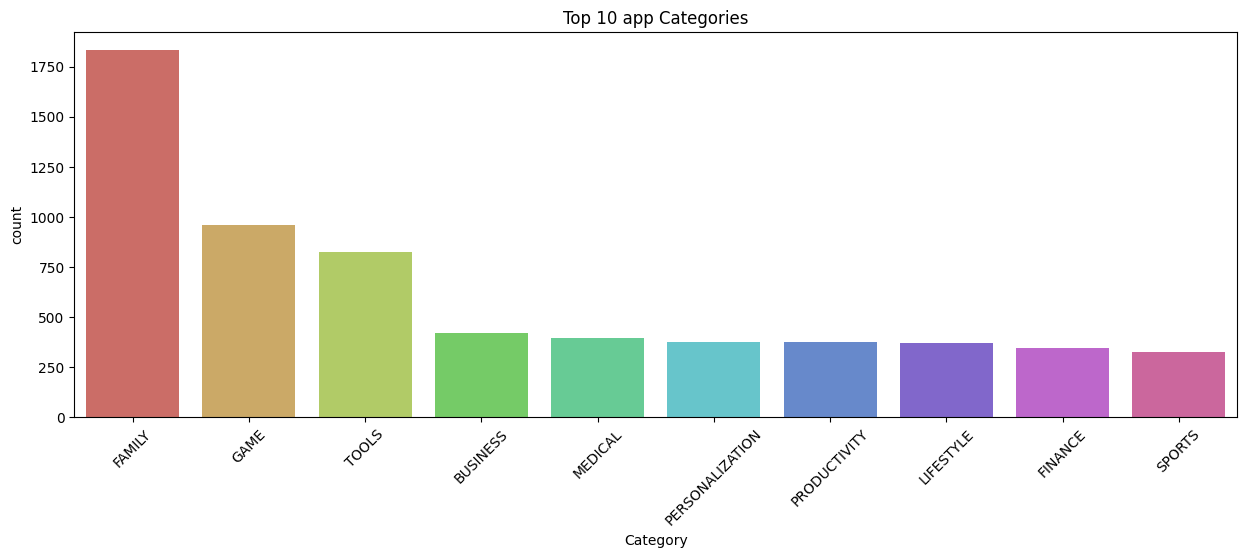

In [236]:
## top 10 app Category
plt.figure(figsize = (15,5))
sns.barplot(x= dfCategory.index[:10], y = 'count' , data= dfCategory[:10], palette = 'hls')
plt.title('Top 10 app Categories')
plt.xticks(rotation = 45)
plt.show()

## Insight
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 10% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

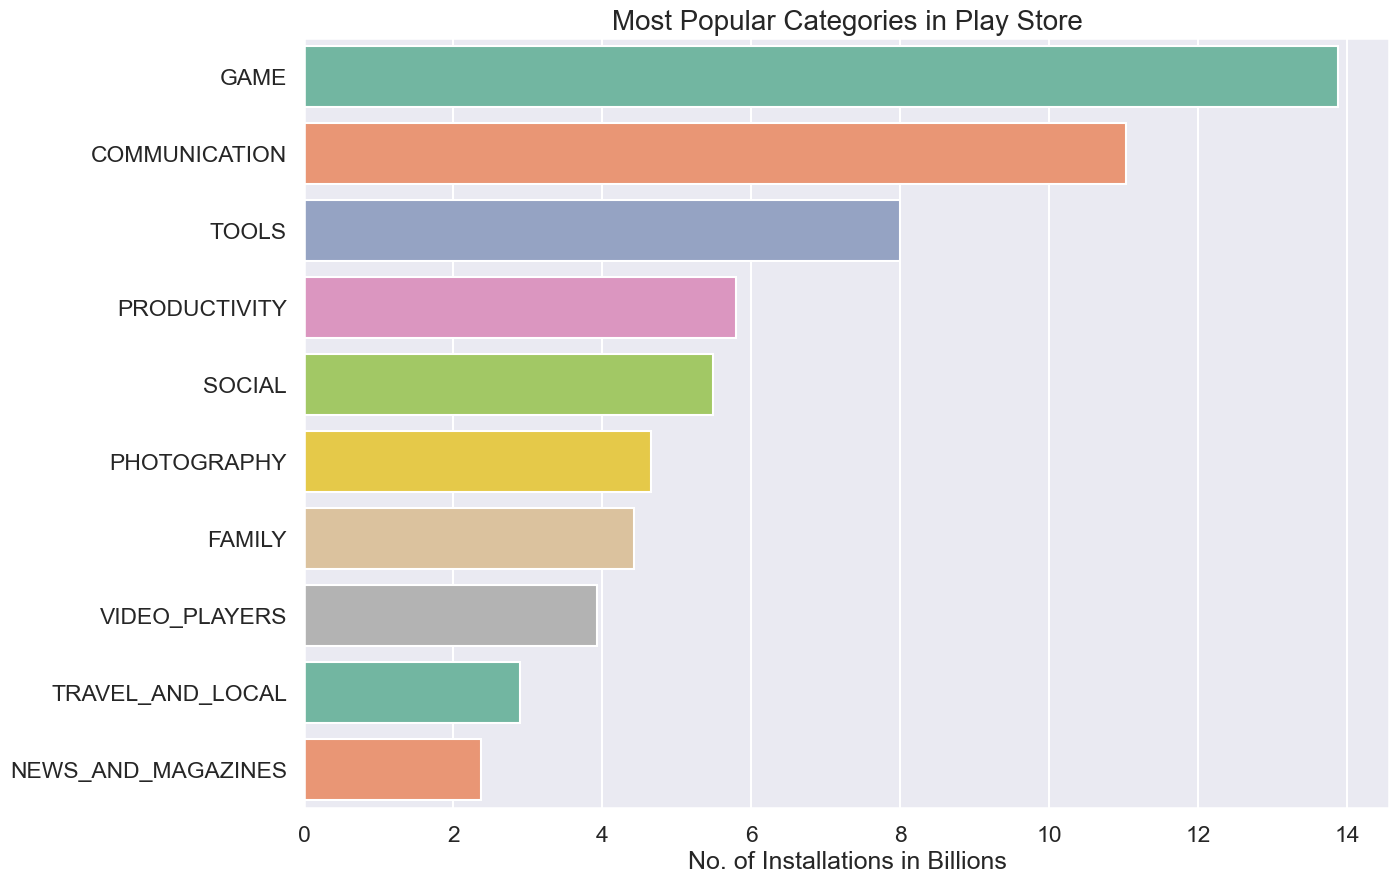

In [239]:
df_cat_installs = dfCopy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2, palette="Set2")
ax.set_xlabel('No. of Installations in Billions') 
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insight 
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 14 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ?

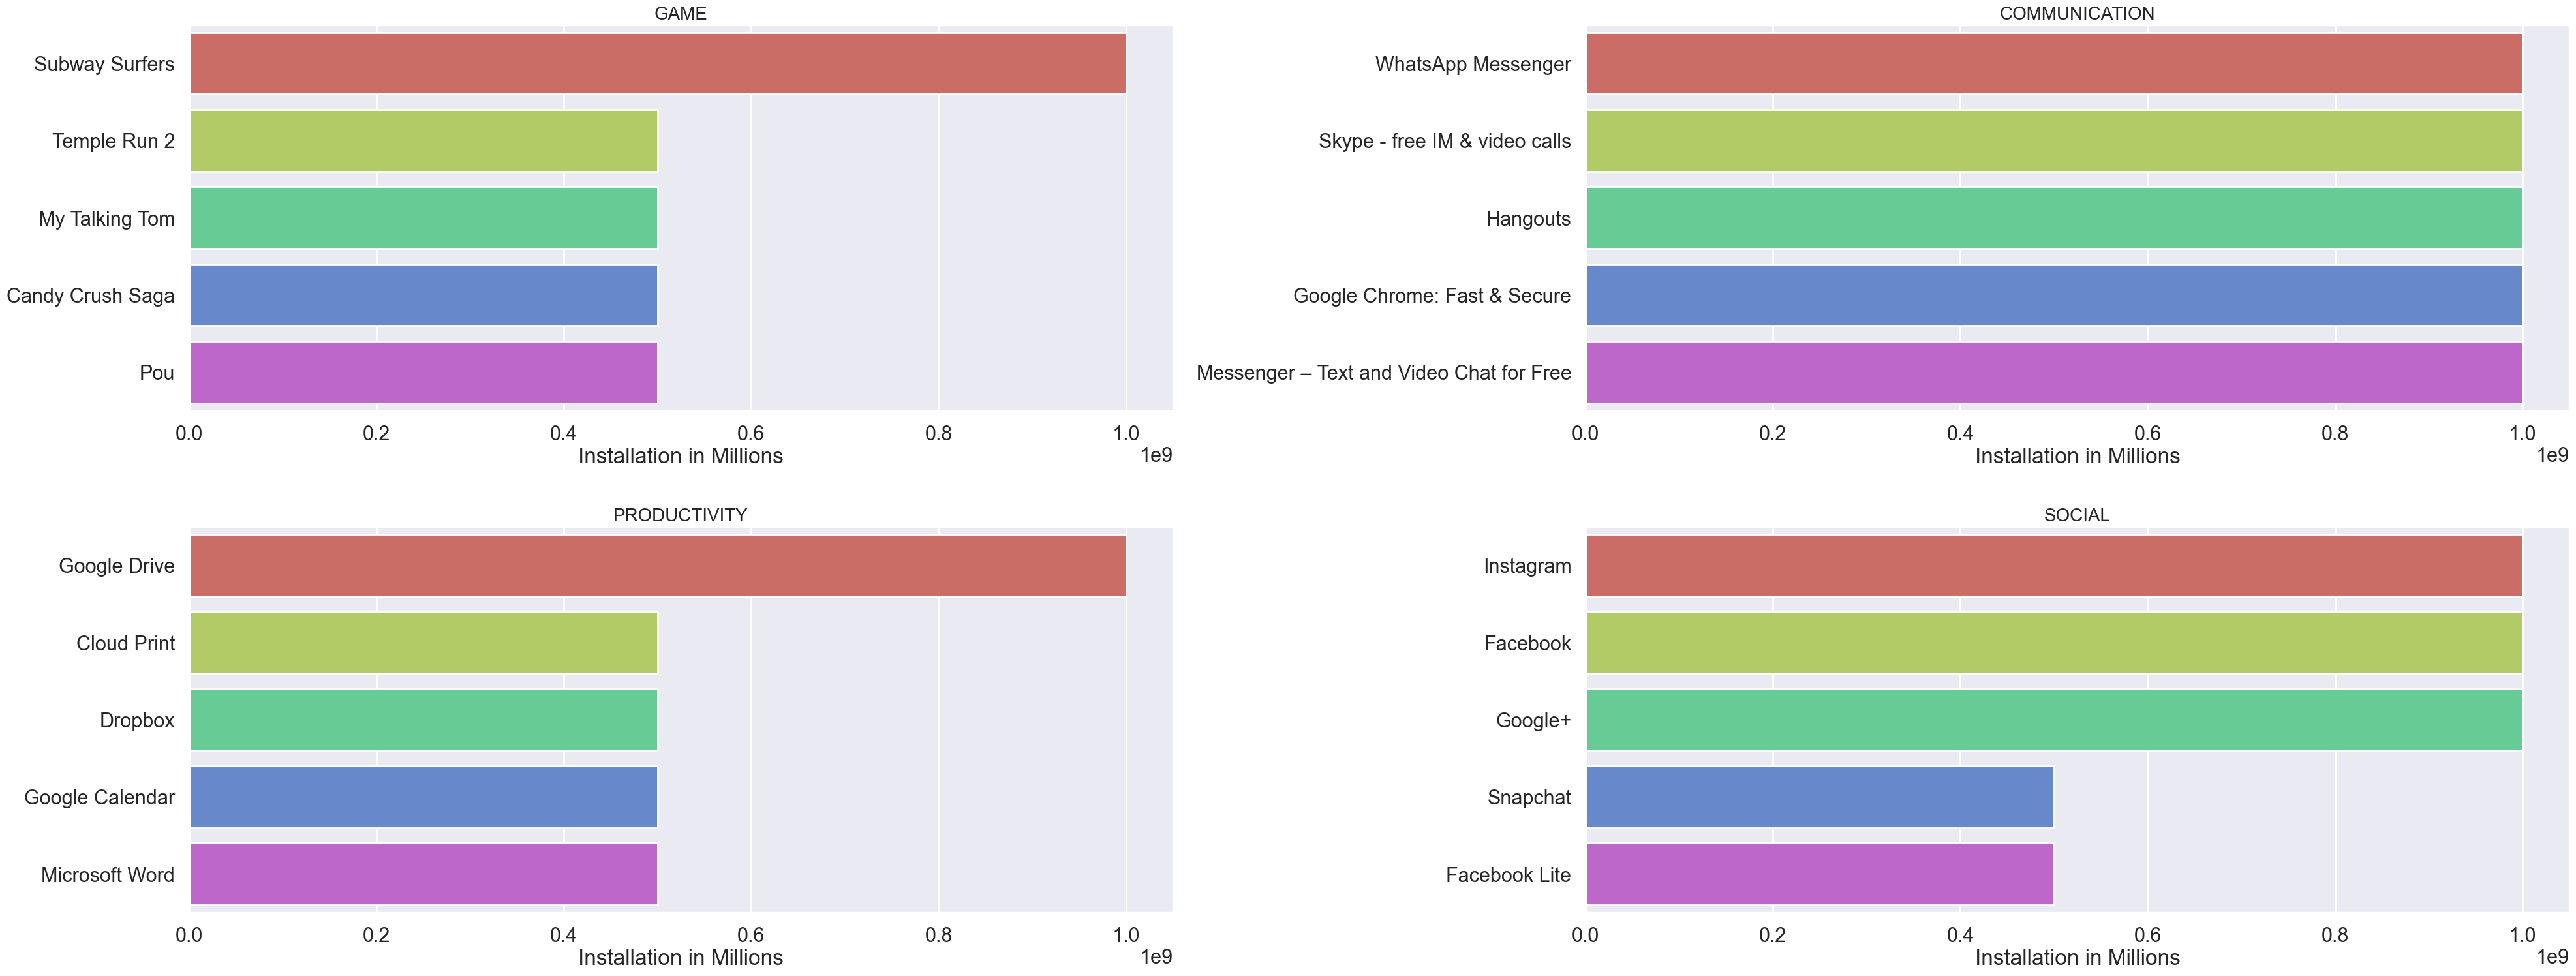

In [241]:
dfa = dfCopy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App', palette = 'hls' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insight
- Most popular game is Subway Surfers.
- Most popular communication app is WhatsApp Messenger.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings?

In [242]:
rating = dfCopy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,TOOLS,1000,ReactNative BG Geolocation,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'ReactNative BG Geolocation' from 'Tools' Category

In [243]:
dfCopy.head()

,App,Category,Rating,Reviews,Size_in_mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
